# TASK #2: IMPORT LIBARIES AND DATASETS

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import jupyter
# from jupyterthemes import jtplot 
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [3]:
# read the csv file 
df = pd.read_csv("diabetes.csv", sep=",")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Display the last 5, 8, and 10 rows in the df DataFrame**

In [5]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [6]:

df = df.drop(columns = 'id')

KeyError: "['id'] not found in axis"

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# since the age is given in days, we convert it into years
df['age'] = df['age']/365

KeyError: 'age'

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Statistical summary of the dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


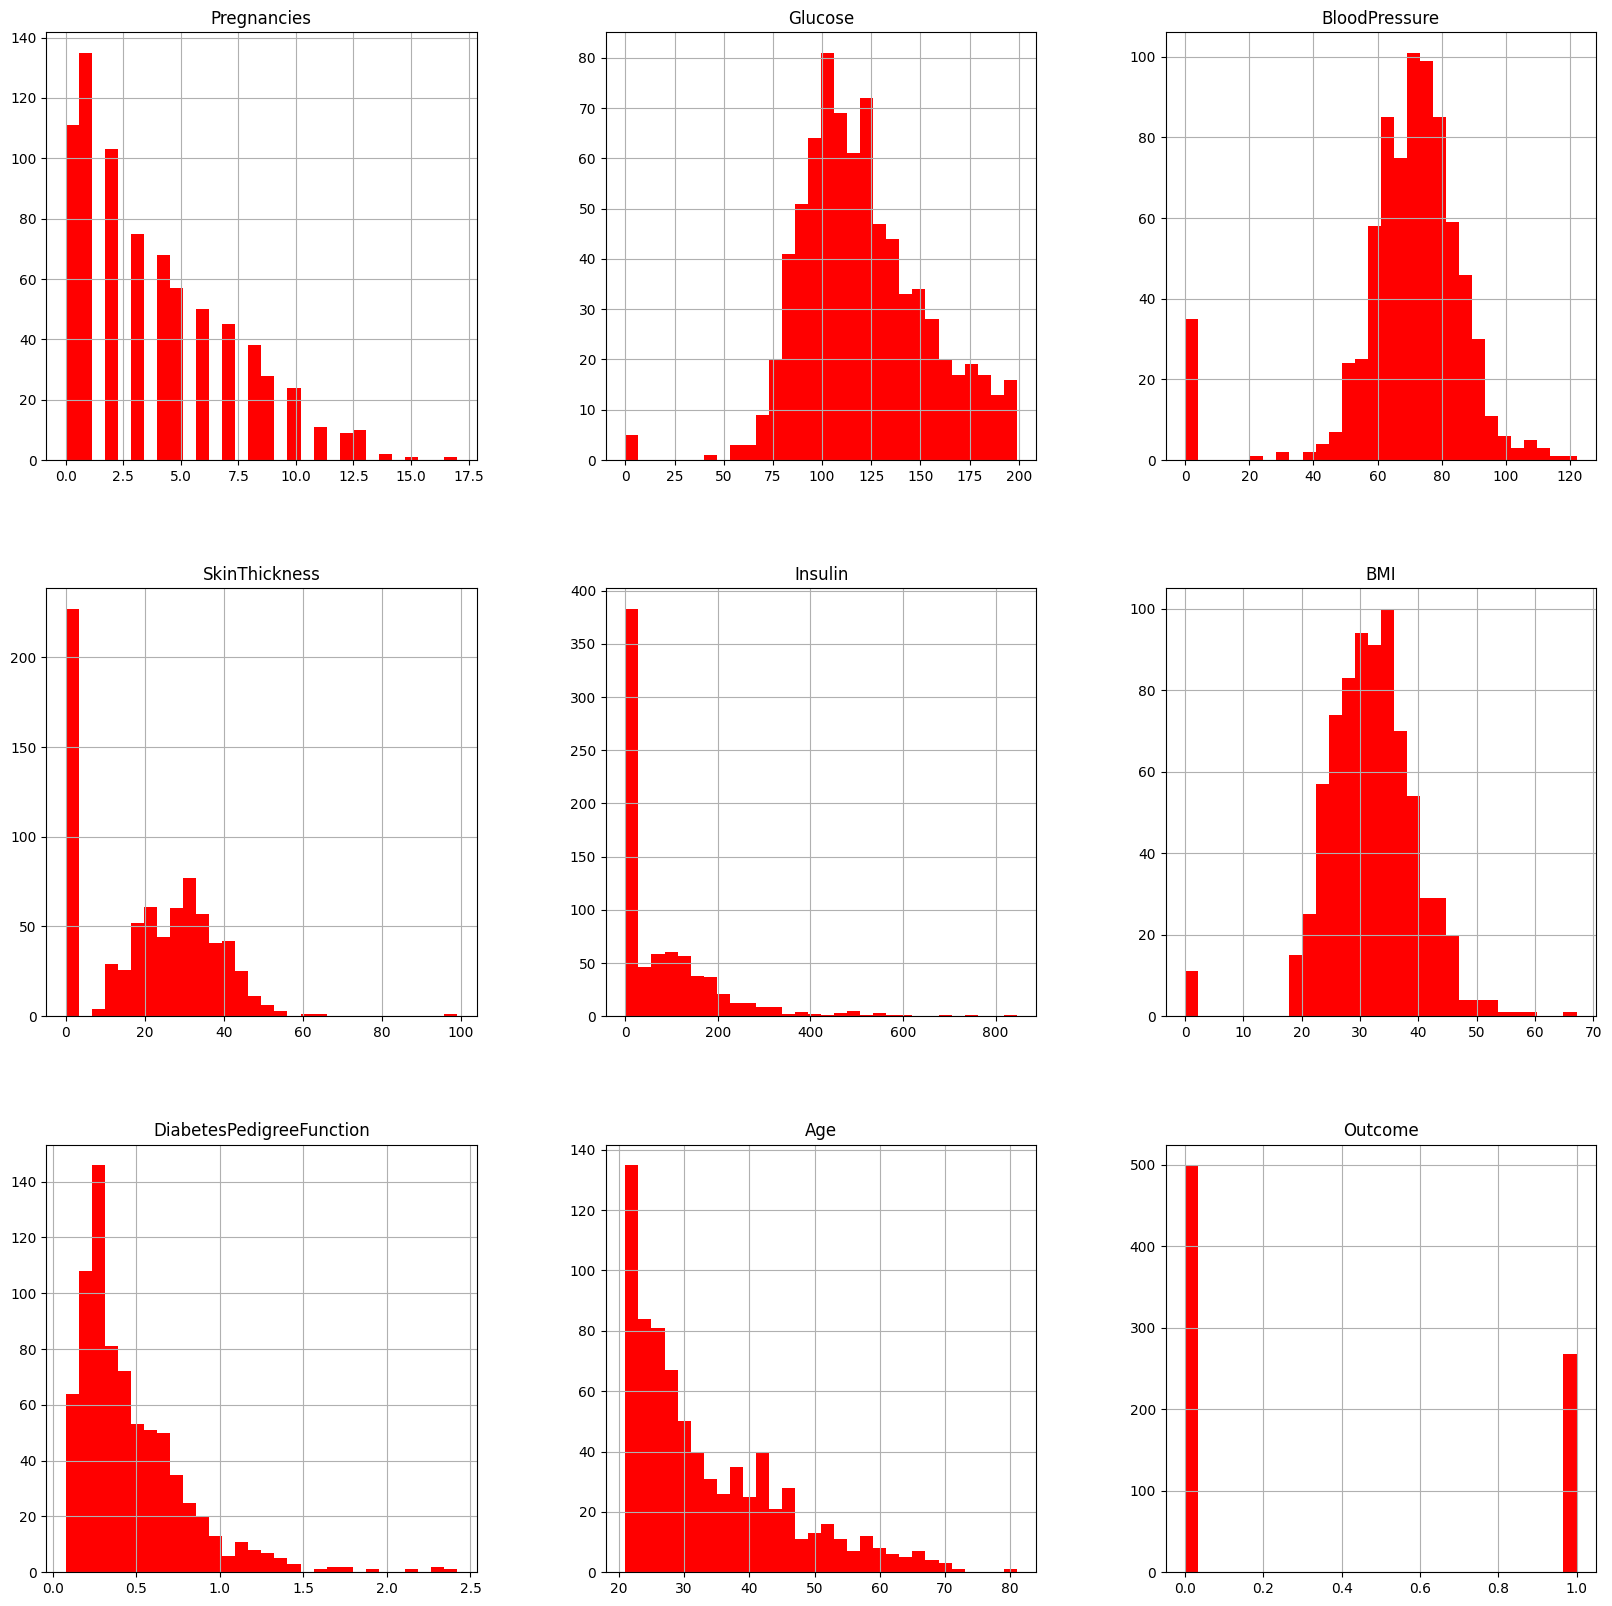

In [11]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [12]:
# get the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


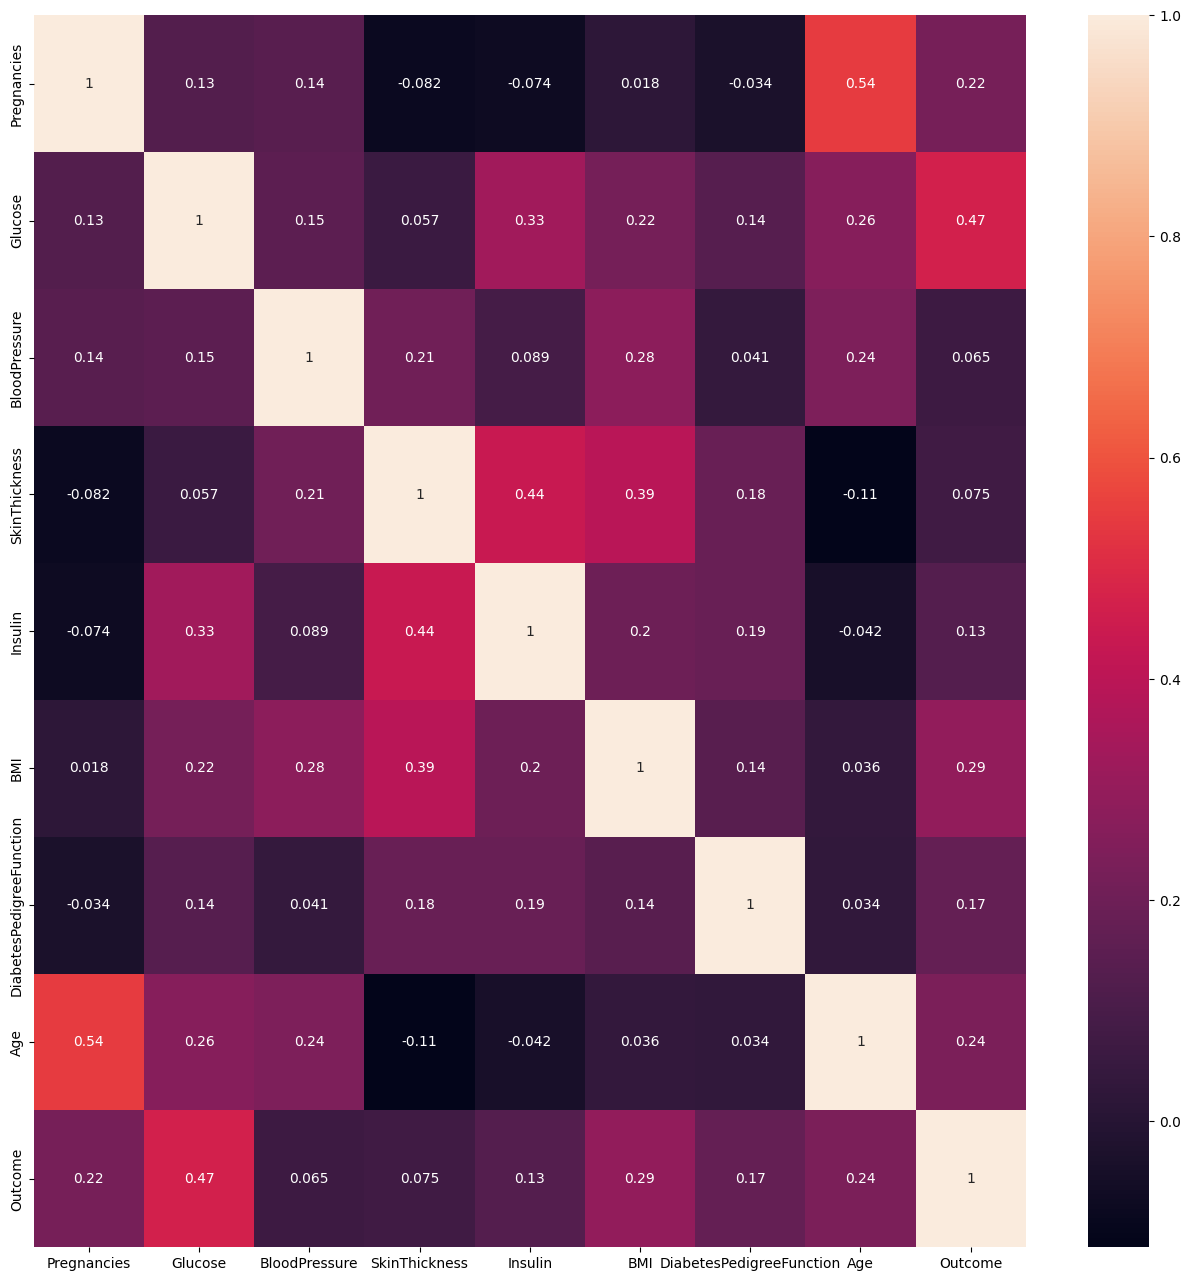

In [13]:
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# split the dataframe into target and features
y = df['Outcome']
X = df.drop(columns =['Outcome'])

In [16]:
X.shape

(768, 8)

In [17]:
y.shape

(768,)

In [18]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
X_train.shape

(614, 8)

In [20]:
y_train.shape

(614,)

In [21]:
X_test.shape

(154, 8)

In [22]:
y_test.shape

(154,)

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
106,1,96,122,0,0,22.4,0.207,27
608,0,152,82,39,272,41.5,0.270,27
28,13,145,82,19,110,22.2,0.245,57
316,3,99,80,11,64,19.3,0.284,30
...,...,...,...,...,...,...,...,...
510,12,84,72,31,0,29.7,0.297,46
299,8,112,72,0,0,23.6,0.840,58
88,15,136,70,32,110,37.1,0.153,43
114,7,160,54,32,175,30.5,0.588,39


# TASK #5: UNDERSTAND XG-BOOST ALGORITHM TO SOLVE CLASSIFICATION TYPE PROBLEMS

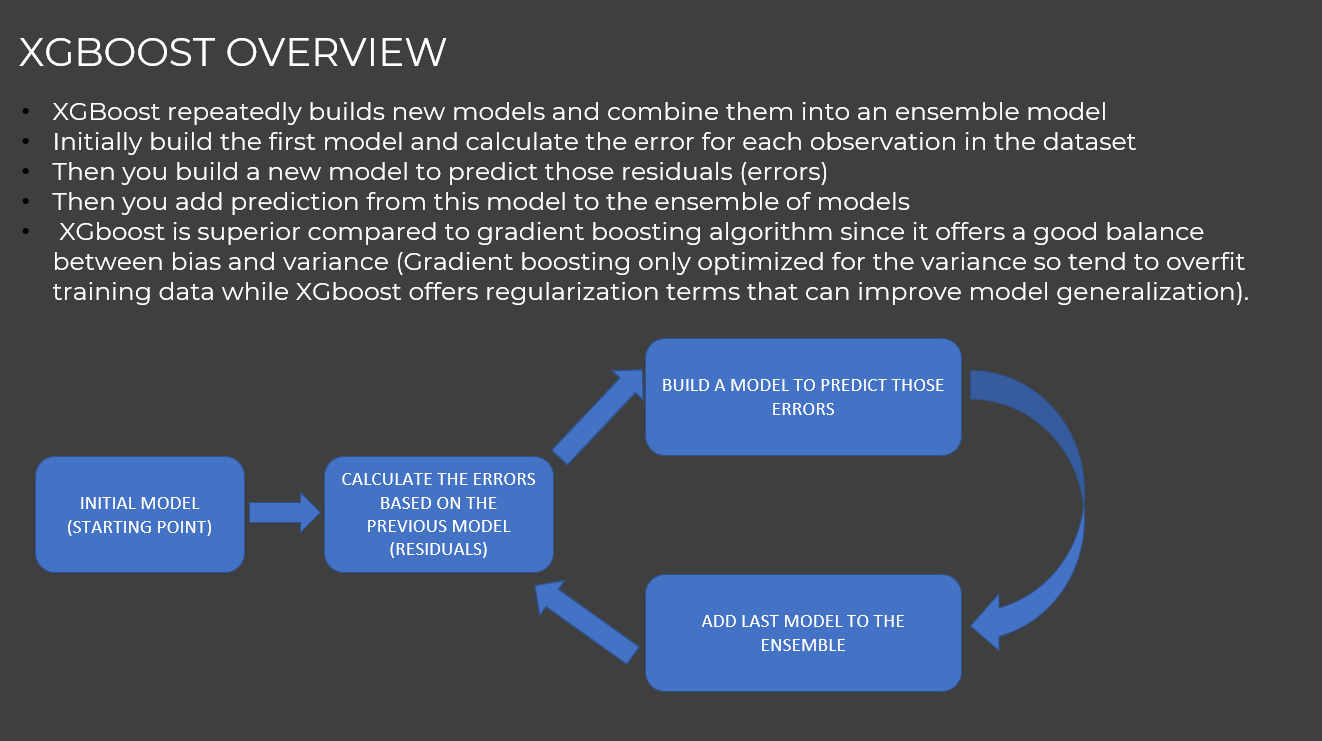

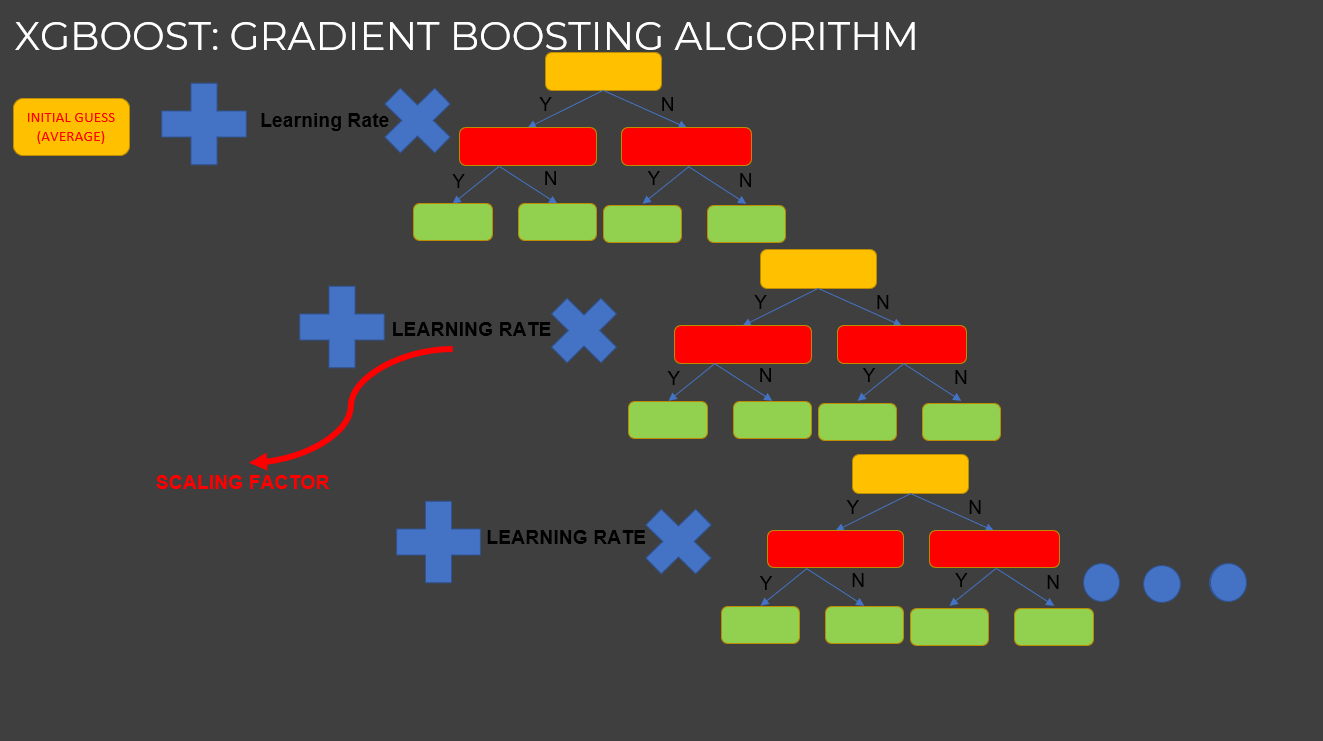

# TASK #6: TRAIN AN XG-BOOST CLASSIFIER IN SK-LEARN

In [24]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from xgboost import XGBClassifier

In [26]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 3, n_estimators = 10)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# TASK #7: TEST XGBOOST CLASSIFIER TO PERFORM INFERENCE

In [27]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7142857142857143


In [28]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.72      0.91      0.80        98
           1       0.70      0.38      0.49        56

    accuracy                           0.71       154
   macro avg       0.71      0.64      0.65       154
weighted avg       0.71      0.71      0.69       154



<Axes: >

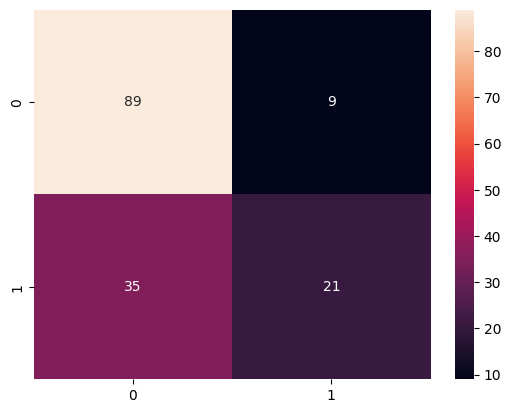

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Try a larger max_depth and retrain the model**
- **Assess the performance of the trained model**
- **What do you conclude?**

# FINAL CAPSTONE PROJECT

Using "Diabetes.csv" dataset, perform the following:
- 1. Load the “diabetes.csv” dataset using Pandas
- 2. Split the data into 80% for training and 20% for testing 
- 3. Train an XG-Boost classifier model using SK-Learn Library
- 4. Assess trained model performance
- 5. Plot the confusion matrix
- 6. Print the classification report

# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Display the last 5, 8, and 10 rows in the df DataFrame**

In [31]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [32]:
df.tail(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [33]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Try a much larger max_depth and retrain the model**
- **Assess the performance of the trained model**
- **What do you conclude?**

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        98
           1       0.63      0.57      0.60        56

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



c:\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


<Axes: >

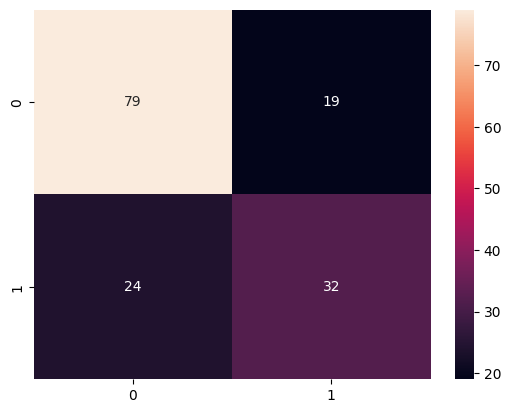

In [34]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 10, n_estimators = 10, use_label_encoder=False)
xgb_classifier.fit(X_train, y_train)


# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

# FINAL CAPSTONE PROJECT SOLUTION

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('diabetes.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


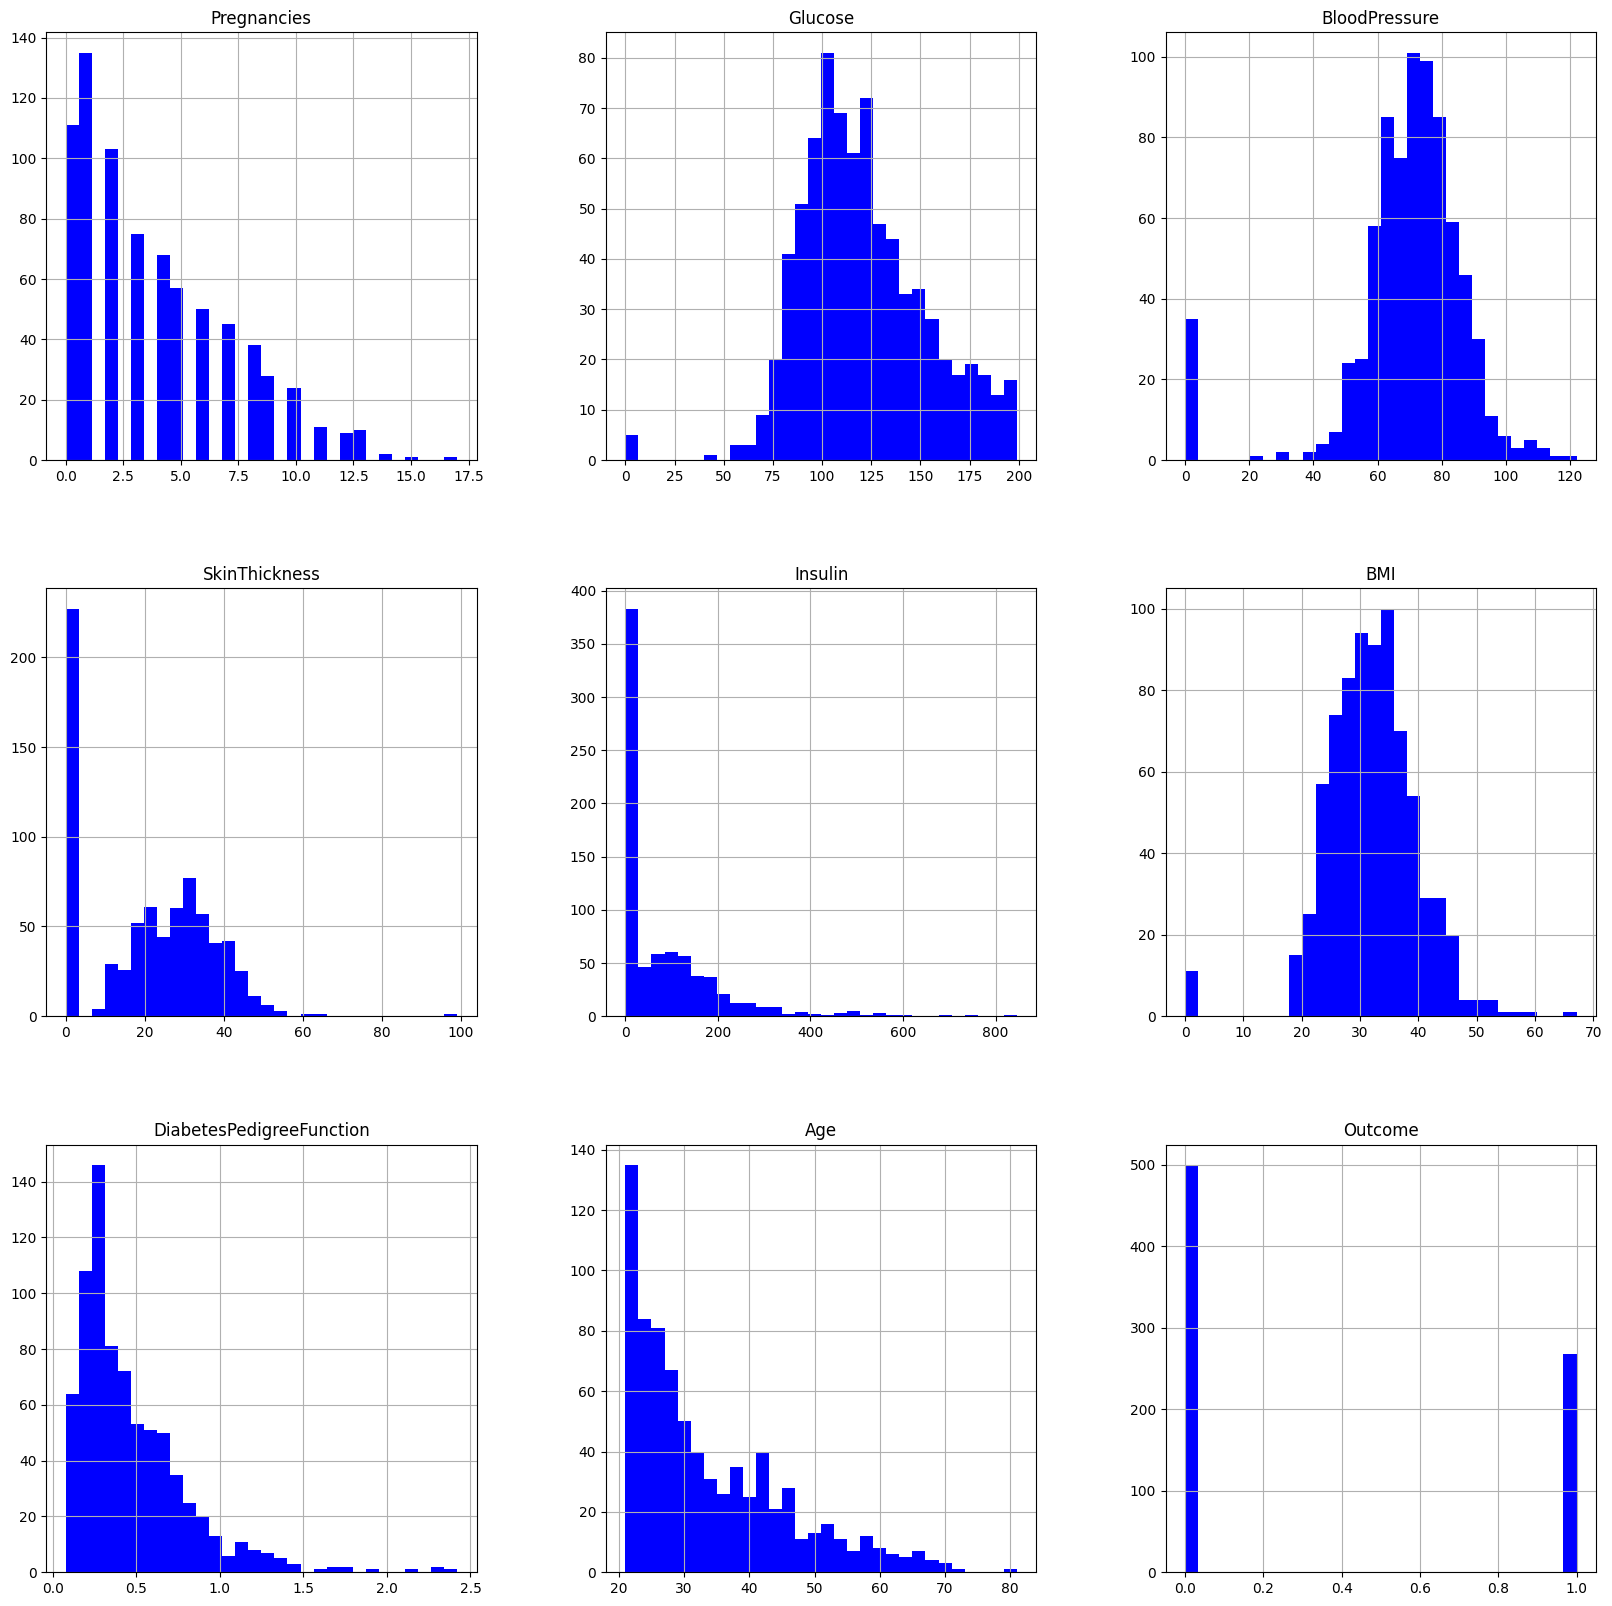

In [38]:
# Plot Histogram
df.hist(bins = 30, figsize = (20,20), color = 'b');

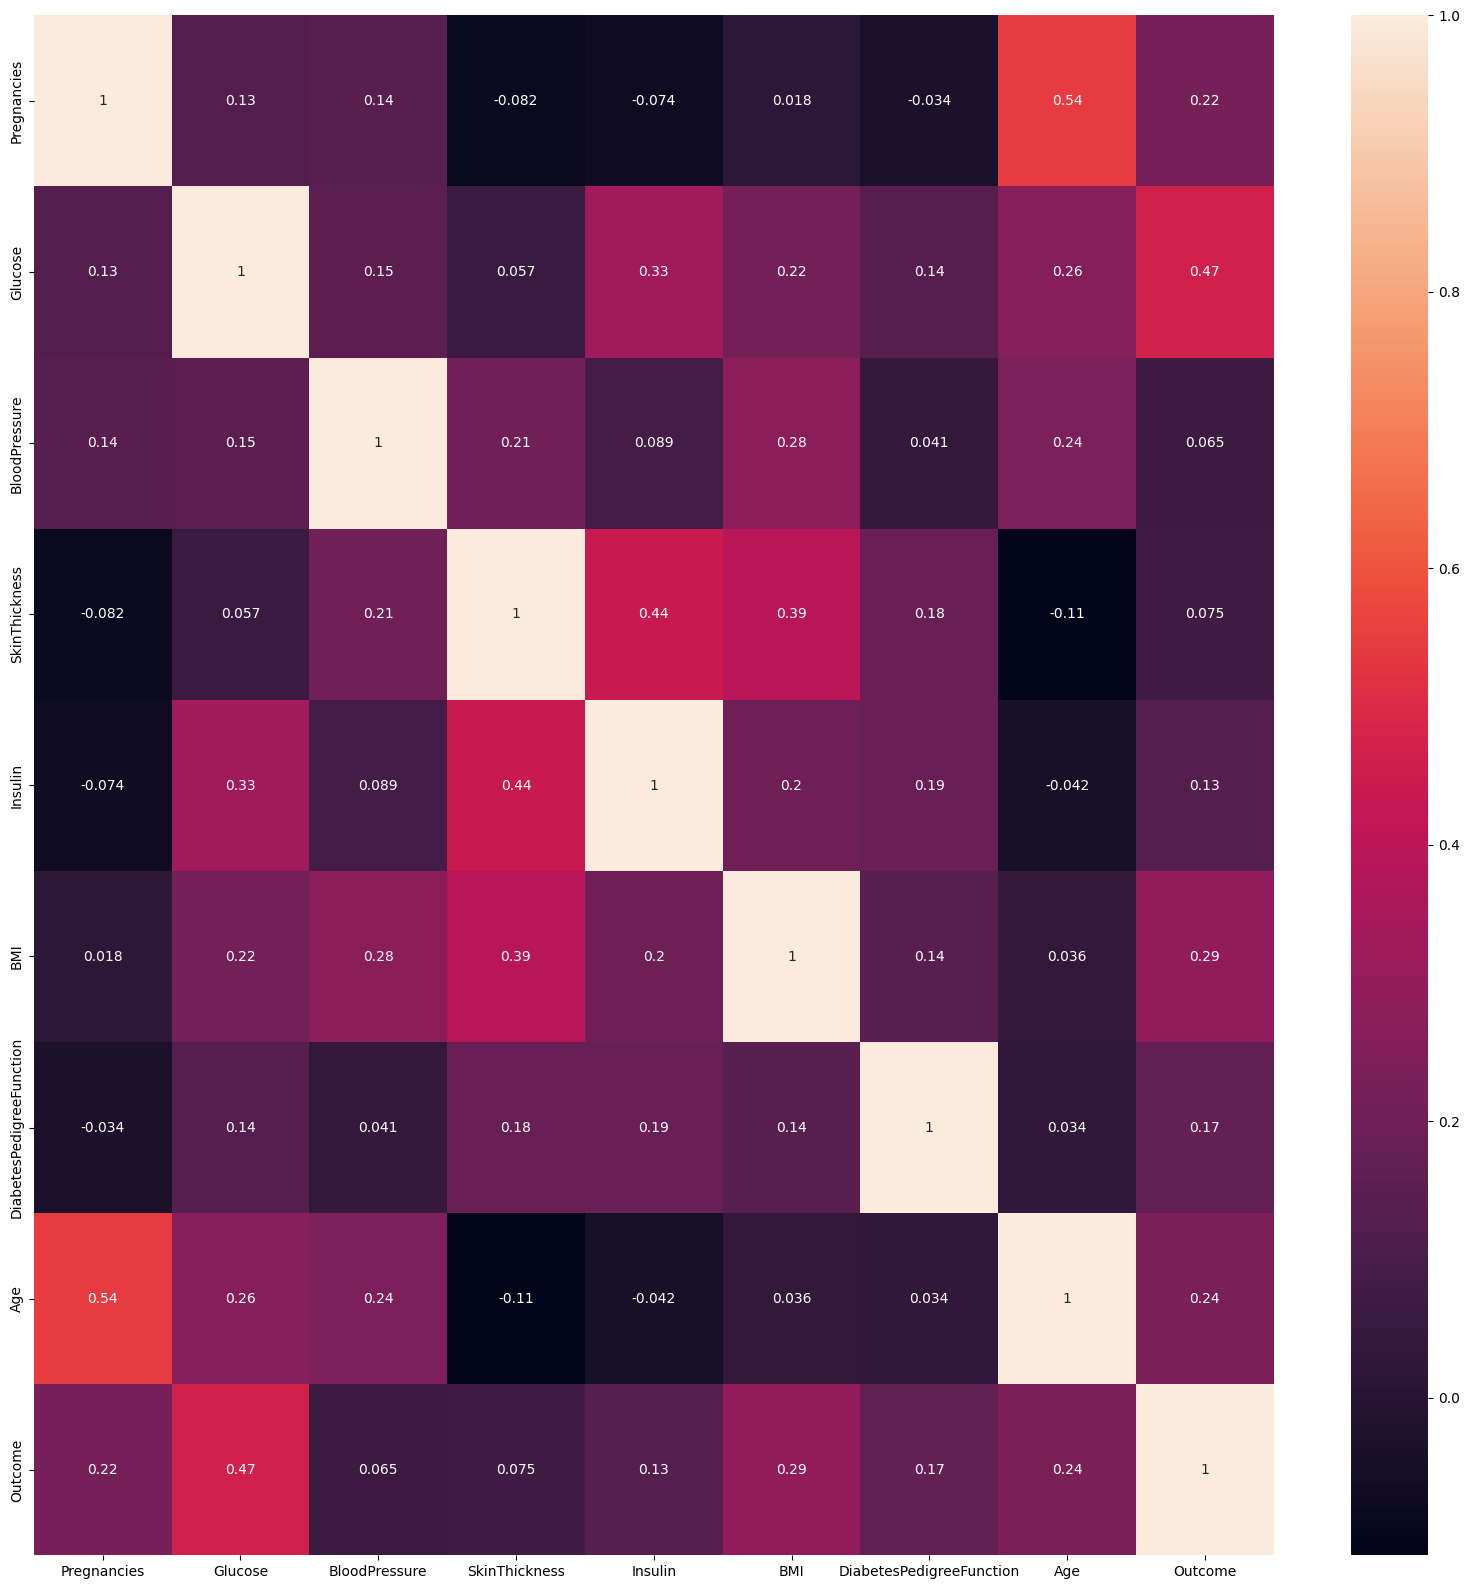

In [39]:
# Plot the correlation matrix
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

In [40]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [41]:
X = df.drop(['Outcome'], axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
X_train.shape

(614, 8)

In [44]:
X_test.shape

(154, 8)

In [45]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 1, n_estimators = 10, use_label_encoder=False)
xgb_classifier.fit(X_train, y_train)

c:\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7012987012987013


In [47]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.68      0.96      0.79        92
           1       0.83      0.32      0.47        62

    accuracy                           0.70       154
   macro avg       0.76      0.64      0.63       154
weighted avg       0.74      0.70      0.66       154



<Axes: >

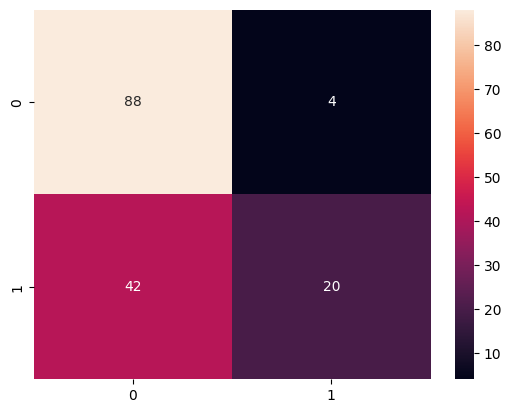

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

# EXCELLENT JOB!